# 1. Titanic (Regression)

- https://www.kaggle.com/c/titanic/overview
- 출력을 csv파일로 저장하여 함께 제출
- submit predictions에 테스트해 볼 것!
- 어떠한 알고리즘을 사용하여도 무방함

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
train_data = pd.read_csv('../Titanic/train.csv')
test = pd.read_csv('../Titanic/test.csv')
#다운받은 train data와 test data 불러오기

In [22]:
train_data.head()
#train data 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()
#test data 확인

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
train_data.columns #train data에서 정보를 나눈 범주 알아내기 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
gender_data = pd.read_csv('../Titanic/gender_submission.csv')

In [27]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
gender_data.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [29]:
Female = train_data.loc[train_data.Sex == 'female',"Survived"] #train data 중에 여자면서 살아남은 사람을 Female로 두기
percent_Female = sum(Female)/len(Female) # 살아있는 경우 1로 되어있으므로 더해진 수(살아있는 사람 수)를 여자인 모든 사람의 수로 나누면 생존률을 구할 수 있음
print("Female survived :", percent_Female)

Female survived : 0.7420382165605095


In [30]:
Male = train_data.loc[train_data.Sex == 'male',"Survived"] #train data 중에 여자면서 살아남은 사람을 male로 두기
percent_Male = sum(Male)/len(Male) # 살아있는 경우 1로 되어있으므로 더해진 수(살아있는 사람 수)를 남자인 모든 사람의 수로 나누면 생존률을 구할 수 있음
print("Male survived :", percent_Male)

Male survived : 0.18890814558058924


따라서 남자보다는 여자가 더 많이 살아남았음을 알 수 있다.
다음으로는 나이와 생존의 상관관계를 따져보자.

In [31]:
min(train_data.Age), max(train_data.Age)
#최소 나이와 최대 나이를 알 수 있음

(0.42, 80.0)

In [32]:
# 위에서 구한 최소 나이와 최대 나이를 기준으로 train_data의 나이 정보들을 숫자로 바꿔주기
train_data.loc[(train_data.Age > 0) & (train_data.Age <= 10), 'Age'] = 0
train_data.loc[(train_data.Age > 10) & (train_data.Age <= 20), 'Age'] = 1
train_data.loc[(train_data.Age > 20) & (train_data.Age <= 30), 'Age'] = 2
train_data.loc[(train_data.Age > 30) & (train_data.Age <= 40), 'Age'] = 3
train_data.loc[(train_data.Age > 40) & (train_data.Age <= 50), 'Age'] = 4
train_data.loc[(train_data.Age > 50) & (train_data.Age <= 60), 'Age'] = 5
train_data.loc[(train_data.Age > 60) & (train_data.Age <= 70), 'Age'] = 6
train_data.loc[(train_data.Age > 70) & (train_data.Age <= 80), 'Age'] = 7

In [33]:
# 위에서 구한 최소 나이와 최대 나이를 기준으로 test의 나이 정보들을 숫자로 바꿔주기
test.loc[(test.Age > 0) & (test.Age <= 10), 'Age'] = 0
test.loc[(test.Age > 10) & (test.Age <= 20), 'Age'] = 1
test.loc[(test.Age > 20) & (test.Age <= 30), 'Age'] = 2
test.loc[(test.Age > 30) & (test.Age <= 40), 'Age'] = 3
test.loc[(test.Age > 40) & (test.Age <= 50), 'Age'] = 4
test.loc[(test.Age > 50) & (test.Age <= 60), 'Age'] = 5
test.loc[(test.Age > 60) & (test.Age <= 70), 'Age'] = 6
test.loc[(test.Age > 70) & (test.Age <= 80), 'Age'] = 7

In [34]:
train_data.Age, test.Age

(0      2.0
 1      3.0
 2      2.0
 3      3.0
 4      3.0
       ... 
 886    2.0
 887    1.0
 888    NaN
 889    2.0
 890    3.0
 Name: Age, Length: 891, dtype: float64,
 0      3.0
 1      4.0
 2      6.0
 3      2.0
 4      2.0
       ... 
 413    NaN
 414    3.0
 415    3.0
 416    NaN
 417    NaN
 Name: Age, Length: 418, dtype: float64)

In [37]:
train_data.isnull().sum() #위에서 나이 데이터에 정보가 없는 부분이 있음을 확인했으므로 train_data에서 정보가 없는 것이 몇개인지 개수를 알아보기 위함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
test.isnull().sum() #위에서 나이 데이터에 정보가 없는 부분이 있음을 확인했으므로 test에서 정보가 없는 것이 몇개인지 개수를 알아보기 위함

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


위 표를 보면 3등급의 사람들이 대략적으로 더 많이 사망한 것을 알 수 있음

In [40]:
pd.crosstab([train_data.Sex, train_data.Survived], train_data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

남녀 모두 높은 클래스일수록 생존확률이 증가했음을 알 수 있음

In [45]:
train_data["initial"]=0
for i in train_data:
    train_data["initial"] = train_data.Name.str.extract('([A-Za-z]+)\.')
train_data["initial"].unique()
#train_data에서 사람들의 이름의 종류 뽑아내기

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [46]:
test["initial"]=0
for i in test:
    test["initial"] = test.Name.str.extract('([A-Za-z]+)\.')
test["initial"].unique()
#test에서 사람들의 이름의 종류 뽑아내기

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [47]:
pd.crosstab(train_data.initial,train_data.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [48]:
pd.crosstab(test.initial,test.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
initial,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


이름으로 대부분 성별과 나이를 파악할 수 있음.


In [50]:
train_data['initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir'],['Mr','Other','Mrs','Mr','Mr','Other','Mrs','Other','Other','Miss','Mr','Miss','Mr','Mrs','Miss','Other','Mr'],inplace=True)
train_data.groupby('initial')['Age'].mean()
#train_data에서 뽑아낸 이름들을 나이를 알 수 있는 호칭으로 분류한 후 나이 알아보기

initial
Miss     1.641892
Mr       2.704156
Mrs      3.036364
Other    1.021277
Name: Age, dtype: float64

In [51]:
test['initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],inplace=True)
test.groupby('initial')['Age'].mean()
#test에서 뽑아낸 이름들을 나이를 알 수 있는 호칭으로 분류한 후 나이 알아보기

initial
Mr    2.48494
Name: Age, dtype: float64

위에서 0,1,2,3,4,5,6,7로 표현했던 숫자들로 이름들의 나이가 정리되어 있음.
하지만 소숫점으로는 나이를 정의하지 않았으므로 반올림해서 정해줌.

In [52]:
train_data.loc[(train_data.Age.isnull()) & (train_data.initial == 'Miss'), 'Age'] = 2
train_data.loc[(train_data.Age.isnull()) & (train_data.initial == 'Mr'), 'Age'] = 3
train_data.loc[(train_data.Age.isnull()) & (train_data.initial == 'Mrs'), 'Age'] = 3
train_data.loc[(train_data.Age.isnull()) & (train_data.initial == 'Other'), 'Age'] = 1

In [53]:
test.loc[(test.Age.isnull()) & (test.initial == 'Miss'), 'Age'] = 2
test.loc[(test.Age.isnull()) & (test.initial == 'Mr'), 'Age'] = 3
test.loc[(test.Age.isnull()) & (test.initial == 'Mrs'), 'Age'] = 3
test.loc[(test.Age.isnull()) & (test.initial == 'Other'), 'Age'] = 1

In [54]:
train_data.Age.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age
3.0,292
2.0,266
1.0,119
4.0,86
0.0,64
5.0,42
6.0,17
7.0,5


In [55]:
test.Age.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age
3.0,141
2.0,131
1.0,47
4.0,46
0.0,22
5.0,20
6.0,10
7.0,1


In [56]:
train_data.isnull().sum() #train_data에서 나이의 빈 데이터였던 부분이 채워진 것을 확인할 수 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
initial          0
dtype: int64

In [57]:
test.isnull().sum() #test에서 나이의 빈 데이터였던 부분이 채워진 것을 확인할 수 있음

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
initial          0
dtype: int64

In [58]:
#다음으로는 비교적 채워넣을 데이터 수가 적은 Embarked 데이터를 채워줄 것이다. 위와 같은 과정을 거치면 된다.
pd.crosstab([train_data.Embarked, train_data.Survived], train_data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

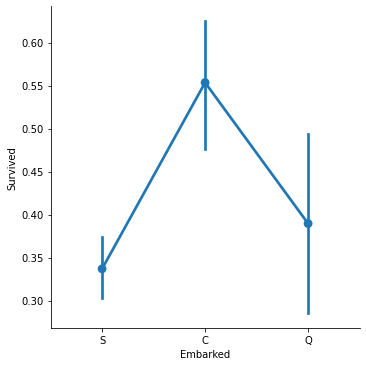

In [59]:
sns.factorplot('Embarked','Survived', data = train_data)
plt.show()

따라서 S에서 생존율이 가장 낮은 것을 알 수 있다.
그렇다면 높은 확률로 빈 데이터는 S일 것이다.

In [60]:
train_data.Embarked.fillna('S', inplace = True)
test.Embarked.fillna('S', inplace = True)
# fillna는 데이터를 채워넣는 역할, inplace = True는 그 전 데이터를 없애고 바로 채워넣는 역할

In [62]:
train_data.isnull().sum() #츨발지의 빈 데이터였던 부분이 채워진 것을 확인할 수 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
initial          0
dtype: int64

In [63]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
initial          0
dtype: int64

마지막으로 남은 객실 번호는 빈 데이터의 수가 매우 많아 제대로 된 예측을 할 수 없다.

In [65]:
# 가족의 수를 정의해주기
train_data['Family_size'] = 0
train_data['Family_size'] = train_data['Parch'] + train_data['SibSp']
train_data['Alone']=0
train_data.loc[train_data.Family_size == 0, 'Alone']=1

In [66]:
test['Family_size'] = 0
test['Family_size'] = test['Parch'] + test['SibSp']
test['Alone']=0
test.loc[test.Family_size == 0, 'Alone']=1

In [67]:
train_data.Family_size

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_size, Length: 891, dtype: int64

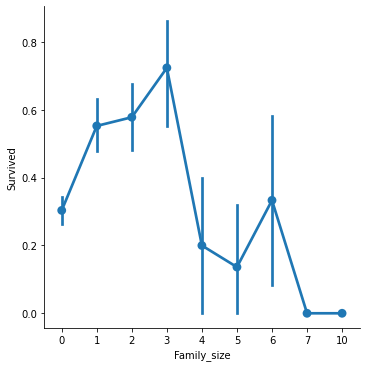

In [68]:
sns.factorplot(train_data.Family_size,'Survived', data = train_data)
plt.show()

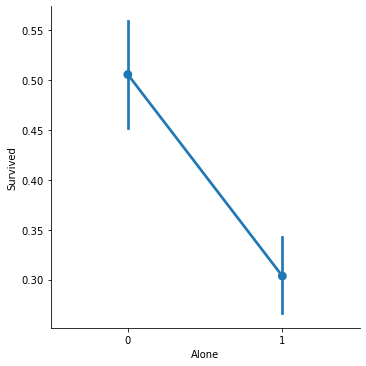

In [69]:
sns.factorplot(train_data['Alone'],'Survived', data = train_data)
plt.show()

위 그래프 두 개를 통해 가족이 없을 수록 생존 확률이 낮다는 사실을 알 수 있음

나이를 0부터 7의 숫자로 표현한 것처럼 다른 범주들도 숫자로 바꿔줘야 함

In [70]:
train_data.Sex.replace(['male','female'],[0,1],inplace=True)
train_data.Embarked.replace(['S','C','Q'],[0,1,2],inplace=True)
train_data.initial.replace(['Mr','Mrs','Miss','Other'],[0,1,2,3],inplace=True)

In [71]:
test.Sex.replace(['male','female'],[0,1],inplace=True)
test.Embarked.replace(['S','C','Q'],[0,1,2],inplace=True)
test.initial.replace(['Mr','Mrs','Miss','Other'],[0,1,2,3],inplace=True)

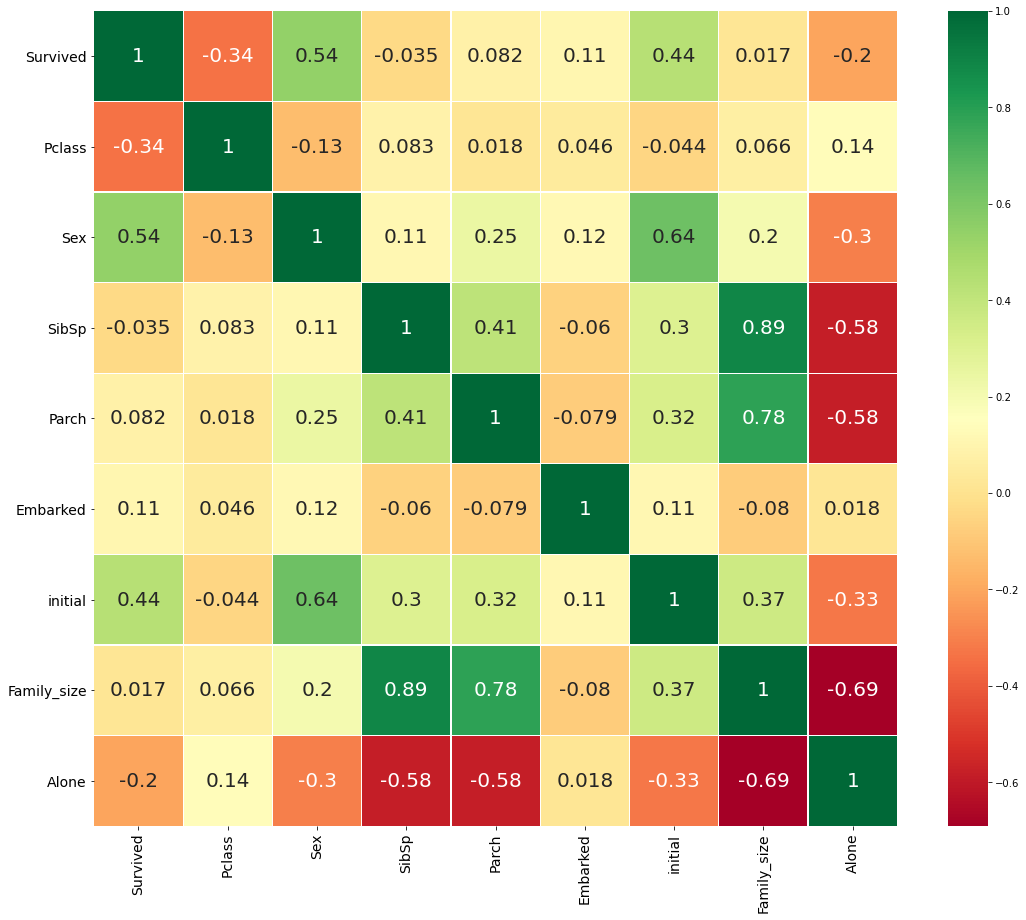

In [72]:
train_data.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True) #train_data에서 drop할 정보들
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

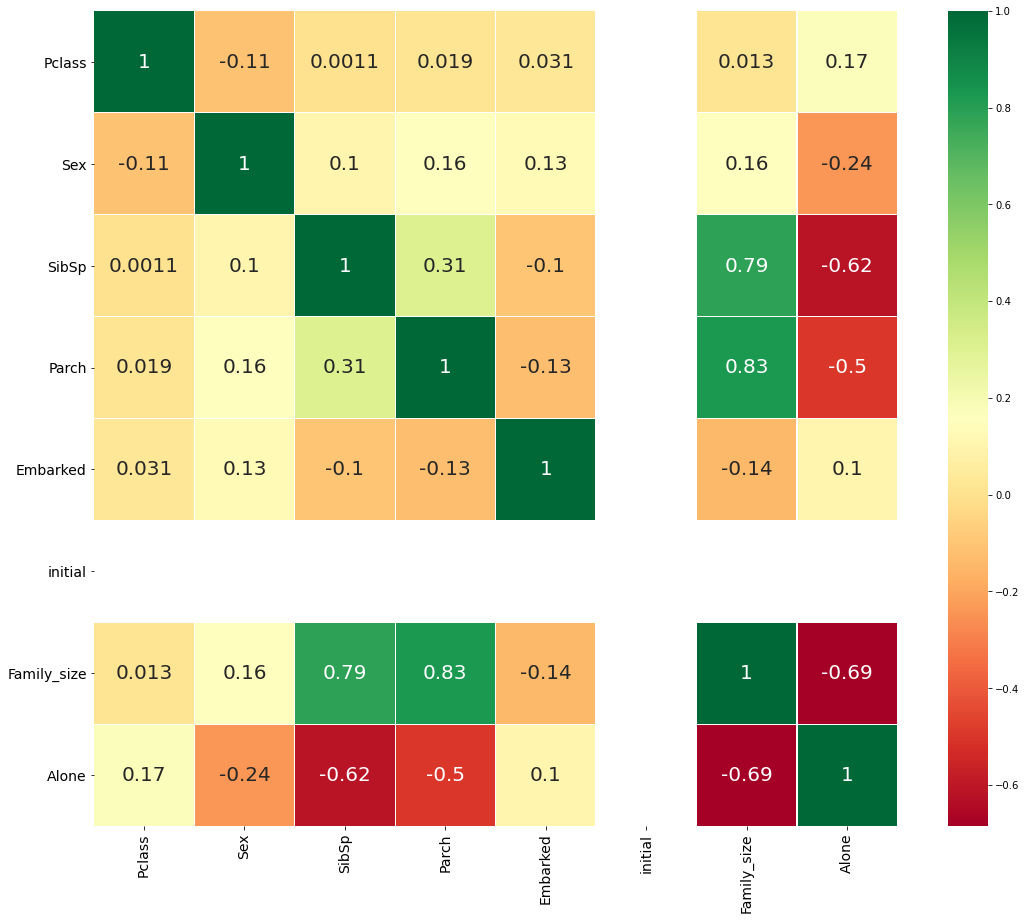

In [73]:
test.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm #분류를 위해 기준선을 정의해야 하기 때문
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [75]:
X = train_data.drop('Survived', axis = 1) #axis=1은 열 방향
Y = train_data['Survived']

In [76]:
X

,Pclass,Sex,SibSp,Parch,Embarked,initial,Family_size,Alone
0,3,0,1,0,0,0,1,0
1,1,1,1,0,1,1,1,0
2,3,1,0,0,0,2,0,1
3,1,1,1,0,0,1,1,0
4,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,3,0,1
887,1,1,0,0,0,2,0,1
888,3,1,1,2,0,2,3,0
889,1,0,0,0,1,0,0,1


In [77]:
model = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1) #무한차원
model.fit(X, Y)
predic1=model.predict(test)
print(accuracy_score(predic1, gender_data.Survived.values)*100)

90.66985645933015


In [78]:
model = svm.SVC(kernel = 'linear', C=1, gamma = 0.1)
model.fit(X, Y)
predic2=model.predict(test)
print(accuracy_score(predic2, gender_data.Survived.values)*100)

98.80382775119617


In [79]:
model = LogisticRegression()
model.fit(X, Y)
predic3 = model.predict(test)
print((accuracy_score(predic3, gender_data.Survived.values))*100)

82.05741626794259


In [80]:
model = DecisionTreeClassifier()
model.fit(X, Y)
predic4 = model.predict(test)
print((accuracy_score(predic4, gender_data.Survived.values))*100)

72.96650717703349


In [81]:
model = GaussianNB()
model.fit(X, Y)
predic5 = model.predict(test)
print((accuracy_score(predic5, gender_data.Survived.values))*100)

94.73684210526315


In [82]:
model = RandomForestClassifier()
model.fit(X, Y)
prediction7 = model.predict(test)
print((accuracy_score(prediction7, gender_data.Survived.values))*100)

89.71291866028707


model = svm.SVC(kernel = 'linear', C=1, gamma = 0.1) 가 정확도가 가장 높음

In [83]:
model = svm.SVC(kernel = 'linear', C=1, gamma = 0.1)
model.fit(X, Y)
predic=model.predict(test)
print(accuracy_score(predic2, gender_data.Survived.values)*100)

98.80382775119617


In [84]:
Survived=pd.DataFrame(predic).rename(columns={0:'Survived'})
Survived

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [85]:
test = pd.read_csv('../Titanic/test.csv')
test_df = test.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [86]:
test_df=pd.concat([test_df,Survived],axis=1)
test_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
test_df.to_csv('../Titanic/titanic.csv', index=False)

# 2. Image classification with CNN

- cnn을 이용하여 다음 이미지를 분류하여라.
- 인풋 데이터는 rgb 정보를 가지고 있다.
- 코드, 결과, 보고서를 함께 제출하여야 한다.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))

Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

In [3]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

Files already downloaded and verified
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

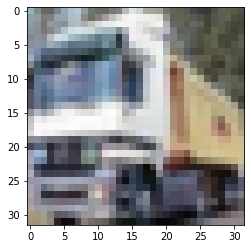

In [4]:
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [5]:
images.size() # [3, 32, 32]: 3 -> RGB(3), 32x32 

torch.Size([3, 32, 32])

In [6]:
import torch.nn as nn

class cnn(nn.Module): 
    def __init__(self): 
        super(cnn, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)#RGB이므로 in_channels=3이어야 함 
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(8*8*64,256)
        self.fc2 = nn.Linear(256,184)
        self.fc3 = nn.Linear(184,10)

    def forward(self, x):
        # convoultion
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2) 
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        # fully connected
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [7]:
model = cnn()

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [8]:
class Print(nn.Module):
    def forward(self,x):
        print(x.size())
        return x

In [9]:
model

cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=184, bias=True)
  (fc3): Linear(in_features=184, out_features=10, bias=True)
)

In [10]:
# training

def train(model, criterion, optimizer, data):
    model.train()
    for batch_i, (X, y) in enumerate(data):
        y_pred = model(X)
        loss = criterion(y_pred, y) 
        optimizer.zero_grad()  
        loss.backward() 
        optimizer.step()

In [11]:
def evaluation(model, criterion, optimizer, data, epoch):
    model.eval()
    test_loss = 0
    corrects = 0
    with torch.no_grad():
        for batch_i, (X, y) in enumerate(data):
            y_pred = model(X)
            test_loss = criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1]
            corrects += (prediction == y).sum().item()
            accuracy = 100. * corrects / len(test_loader.dataset)
        
        if(epoch% 5==0):
            print(epoch, "loss=", test_loss.item(), "accu=", accuracy)
            
    return test_loss, accuracy  

In [ ]:
test_Accuracy = []
nums_epoch = 30
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    E, accu = evaluation(model, criterion, optimizer, test_loader, epoch)
    test_Accuracy.append(accu)

0 loss= 2.2104194164276123 accu= 33.94


RGB는 채널이 3개여야하므로 in_channels=3으로 설정해주었다. 과제를 해결할 때는 흑백으로 되어 있어 채널이 비교적 간단했었는데, 입력 채널의 수가 늘어나니 복잡하다는 생각이 들었다.그래도 수업시간에 실습으로 해본 코드를 이용해 해결하려고 노력했다.
먼저 여기저기 흩어져 있는 데이터들을 분석하기 쉽게 하기 위해서 [-1,1]로 normalization을 해주었다.
CIFAR-10은 32x32 크기의 이미지이고, 흑백이 아니므로 input data의 크기는 images.size()를 통해 32*32*3임을 알 수 있었다.
코드에 대해 설명하자면, Conv relu Maxpool Conv relu Maxpool Conv relu Maxpool Linear fullyconnected 순으로 진행되는 코드이다. Convolution은 필터의 수를 통해 합성곱 연산을 수행하는 과정이다. 여기서 필터는 이미지의 특징을 알아내기 위한 파라미터인데, CNN에서 Kernel과 필터는 같은 의미로 사용된다고 한다. 따라서 내가 사용한 필터는 3*3 필터라고 할 수 있다. 한편 Convolution을 수행하는 과정에서 필터의 영향으로 Feature map의 크기는 입력한 데이터보다 작아질 수 밖에 없다. 따라서 이를 방지하기 위해 사용하는 것이 padding이다. 패딩은 입력된 데이터 외곽에 특정 데이터로 채워넣는 역할을 하는데, 나는 1로 설정했으므로 1픽셀씩 둘러싼다는 의미가 된다. Maxpool층은 최대값만 모아주는 역할을 하며, 이 층을 통과하면 행렬의 크기가 감소하며, 채널 수의 변동이 없다.
32*32의 이미지는 Maxpool층을 지나면서 18*18크기의 이미지로 바뀐다. 두 번째 Conv층을 지나면서  또한 2*2 크기의 max pooling을 거치면서 14*14의 이미지가 된다. 따라서 마지막 층을 거치게 되면 10*10의 이미지가 된다.
training 과정에서 손실을 criterion으로 표현한 것을 볼 수 있다. 이를 알아내기 위해 위쪽에서 정의할 때 사용한 것을 보면nn.CrossEntropyLoss()이라고 설정한 것을 알 수 있다. crossentropyloss는 정답에 대해서만 로그를 취한 합을 구해 최종의 손실값을 구해내는 역할을 한다. optimizer.zero_grad()는 오차를 줄이기 위해 사용하며, 모델의 변화도를 재설정한다. 변화값은 더해지기 때문에 중복계산을 막기 위해 반복할 때마다 0으로 설정해준다.
optimizer는 Adam을 사용했다. Adam은 기울기를 통해 최솟값을 구해내는 SGD와, 최솟값이 여러개일 때 분석하고 있는 데이터 주변에 존재하는 최소값에 도달할 경우 더 이상 분석하지 않는데, 이 부분을 탈출할 수 있게 해주는 momentum을 합친 역할을 해주기 때문에 더 정확한 최솟값을 얻어낼 수 있다. 
최적의 코드를 찾아내기 위해 구글링을 하면서, 같은 개념을 사용하고 데이터를 사용하더라도 구현하는 순서나 사용하는 용어에 따라서 매우 다양한 코드가 존재할 수 있음을 알게 되었다. 코드 중에는 이해할 수 있는 코드도 있었지만, 나에게 정말 어려운 코드도 있었는데, 이러한 탐색 과정을 통해 기초부터의 꼼꼼한 공부의 중요성을 깨닫게 되어 머신러닝에 대한 공부 의지를 다질 수 있는 계기가 되었다.
위의 결과를 보면 비교적 낮은 정확도를 갖는다는 것을 알 수 있는데, 이는 CNN 구조에 대한 나의 이해 부족에서 비롯된 것이라고 생각한다. 따라서 공부를 통해 충분한 이해를 한 후 정확도를 더 높일 수 있는 코드를 만들고 싶다.
